In [6]:
import pandas as pd

import statsmodels.api as sm

# Data
df = pd.DataFrame({
    "Student": [1, 2, 3, 4, 5, 6, 7],
    "Hours":   [2, 4, 5, 7, 8, 10, 12],
    "Score":   [55, 60, 75, 80, 85, 95, 100],
})

# Prepare predictors (add intercept) and response
X = sm.add_constant(df["Hours"])
y = df["Score"]

# Fit OLS model
model = sm.OLS(y, X).fit()

# Output results
print(model.summary())
print("\nCoefficients:")
print(model.params)

# Attach predictions to the DataFrame
df["Predicted_Score"] = model.predict(X)
print("\nData with predictions:")
print(df[["Student", "Hours", "Score", "Predicted_Score"]])

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     123.6
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           0.000103
Time:                        16:30:14   Log-Likelihood:                -17.761
No. Observations:                   7   AIC:                             39.52
Df Residuals:                       5   BIC:                             39.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2353      3.214     14.384      0.0

/home/gabor/miniconda3/envs/prob_and_stat/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


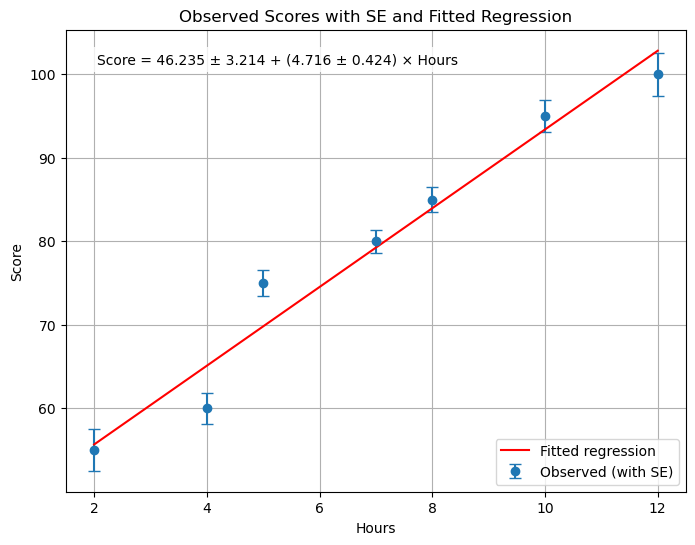

In [9]:
import numpy as np

import matplotlib.pyplot as plt

# Get prediction summary for existing X (per-observation se)
pred_df = model.get_prediction(X).summary_frame()

plt.figure(figsize=(8, 6))

# Scatter observed scores with error bars = standard error of the mean prediction
plt.errorbar(df['Hours'], df['Score'],
             yerr=pred_df['mean_se'],
             fmt='o', capsize=4, label='Observed (with SE)')

# Regression line (dense grid)
x_line = np.linspace(df['Hours'].min(), df['Hours'].max(), 200)
X_line = pd.DataFrame({'const': 1.0, 'Hours': x_line})
y_line = model.predict(X_line)
plt.plot(x_line, y_line, color='red', label='Fitted regression')


# Annotate equation with coefficient standard errors
intercept = model.params['const']
slope = model.params['Hours']
se_intercept = model.bse['const']
se_slope = model.bse['Hours']
eq_text = (f"Score = {intercept:.3f} ± {se_intercept:.3f} "
           f"+ ({slope:.3f} ± {se_slope:.3f}) × Hours")
plt.annotate(eq_text, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=10, ha='left', va='top',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Observed Scores with SE and Fitted Regression')
plt.legend()
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:     Processed_requests   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     9.790
Date:                Sun, 30 Nov 2025   Prob (F-statistic):             0.0260
Time:                        10:15:51   Log-Likelihood:                -24.808
No. Observations:                   7   AIC:                             53.62
Df Residuals:                       5   BIC:                             53.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           72.2857     12.491      5.787   

/home/gabor/miniconda3/envs/prob_and_stat/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


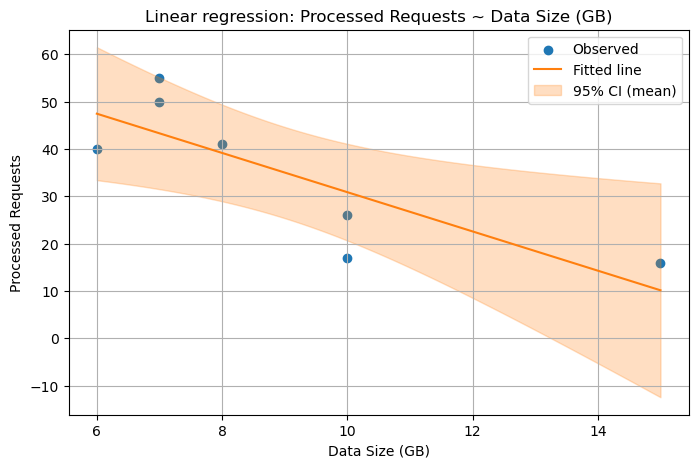

In [4]:
# Data
df = pd.DataFrame({
    "Data_size_GB": [6, 7, 7, 8, 10, 10, 15],
    "Processed_requests": [40, 55, 50, 41, 17, 26, 16],
})

# Fit linear regression using statsmodels (uses df, sm, np, plt already defined in the notebook)
X_reg = sm.add_constant(df["Data_size_GB"])
y_reg = df["Processed_requests"]

res = sm.OLS(y_reg, X_reg).fit()

# Summary and key results
print(res.summary())
print("\nCoefficients:\n", res.params)
print("\nStd errors:\n", res.bse)
print(f"\nR-squared: {res.rsquared:.4f}")
print(f"F-statistic: {res.fvalue:.4f} (p = {res.f_pvalue:.4g})")

# Predictions and confidence intervals for the observed X
pred_obs = res.get_prediction(X_reg).summary_frame(alpha=0.05)
df_pred = df.copy()
df_pred["Predicted"] = pred_obs["mean"]
df_pred["CI_lower"] = pred_obs["mean_ci_lower"]
df_pred["CI_upper"] = pred_obs["mean_ci_upper"]
print("\nData with predictions:\n", df_pred)

# Plot observed data, fitted line and 95% CI for the mean
x_grid = np.linspace(df["Data_size_GB"].min(), df["Data_size_GB"].max(), 200)
X_grid = sm.add_constant(x_grid)
pred_grid = res.get_prediction(X_grid).summary_frame(alpha=0.05)

plt.figure(figsize=(8, 5))
plt.scatter(df["Data_size_GB"], df["Processed_requests"], color='C0', label='Observed')
plt.plot(x_grid, pred_grid["mean"], color='C1', label='Fitted line')
plt.fill_between(x_grid, pred_grid["mean_ci_lower"], pred_grid["mean_ci_upper"], color='C1', alpha=0.25, label='95% CI (mean)')
plt.xlabel("Data Size (GB)")
plt.ylabel("Processed Requests")
plt.title("Linear regression: Processed Requests ~ Data Size (GB)")
plt.legend()
plt.grid(True)
plt.show()